In [1]:
import tensorflow as tf

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [3]:
def rargmax(vector):
    """모두 0일때는 랜덤하게 인덱스를 주는 argmax 함수"""
    m = np.amax(vector) # np.amax: argmax
    indices = np.nonzero(vector==m)[0]
    return pr.choice(indices)

In [4]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name':'4x4', 'is_slippery':True}
)

In [5]:
env = gym.make('FrozenLake-v3')

In [9]:
Q = np.zeros([env.observation_space.n, env.action_space.n]) # Q table 만들기
dis = 0.99
learning_rate = 0.8
num_episodes = 2000

rList = [] # 각 에피소드 마다 reward 저장 
for i in range(num_episodes):
    state = env.reset() # environment 재설정 
    rAll = 0
    done = False
    if i%500==0:
        print("Episdoe"+str(i))
    
    while not done:
        action = np.argmax(Q[state, :]+np.random.randn(1, env.action_space.n)/(i+1)) # action 선택 
        new_state, reward, done, _ = env.step(action) # state 와 reward 업데이트 
        Q[state, action] = learning_rate*(reward + dis*np.max(Q[new_state, :])) + (1-learning_rate)*Q[state, action] # Q-Table 업데이트 
        rAll += reward
        state = new_state
    rList.append(rAll)

Episdoe0
Episdoe500
Episdoe1000
Episdoe1500


Success rate: 0.66
Final Q-Table value
Left Down Right Up
[[1.43897763e-02 4.30776306e-01 1.21026291e-02 2.26934413e-02]
 [1.19803029e-04 7.24912361e-03 3.57015530e-04 3.91199541e-01]
 [5.75418303e-03 5.18779735e-03 5.44193464e-03 2.67700895e-01]
 [2.02328396e-03 2.22541335e-04 4.13404305e-04 2.21045296e-01]
 [3.09901923e-01 6.66015279e-04 6.44485966e-04 6.59975195e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.94962568e-04 6.89967275e-05 4.93171011e-02 3.11346773e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.24980357e-03 2.20662686e-03 4.44695829e-04 5.63901548e-01]
 [1.11285965e-03 3.98160900e-01 1.50301073e-03 0.00000000e+00]
 [8.35901775e-01 0.00000000e+00 1.02224779e-04 3.84531466e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.70249217e-03 9.48254373e-01 1.46299649e-02]
 [0.00000000e+00 0.00000000e+00 9.92256727e-01 0.00000000e+0

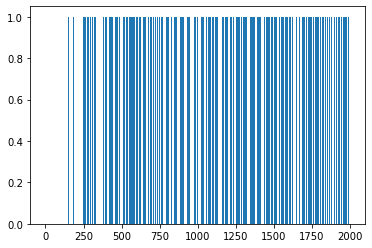

In [10]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table value")
print("Left Down Right Up")
print(Q)
plt.bar(range(len(rList)), rList)
plt.show()